## 1. 필요 Library 설치

In [1]:
!pip install beautifulsoup4

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [108]:
!pip install pillow

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
!pip install wordcloud

In [31]:
!pip install matplotlib

## 2. 실행 코드

### (1) 라이브러리 불러오기

In [8]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image

import pandas as pd
import numpy as np
import random
import requests
import re

import matplotlib.pyplot as plt
from matplotlib import font_manager

### (2) 네이버 종목 토론방 긁어오기

In [9]:
def stock_discussion_room(stock_code, pages):
    
    opinion_date_total = []
    opinion_total = []
    chanti = []
    anti = []
    
    r = re.compile(r'\d{4}.\d{2}.\d{2}')
    
    for i in range(pages) :
        
        url = 'https://finance.naver.com/item/board.nhn?code=' + stock_code + '&page=' + str(i+1)
        response = requests.get(url)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        opinion = soup.select('.title')
        opinion_date = []
        
        for date in soup.find_all('span') : 
            match = r.search(date.text)
            
            if match != None :
                opinion_date.append(match.group())

        opinion_date = opinion_date[-20:]
        
        for value in opinion_date : 
            opinion_date_total.append(value)
        
        for i in range(20) :    
            opinion_total.append(opinion[i].find('a')['title'])
           
        for i, finger in enumerate(soup.find_all('strong')) :
            
            if i in np.arange(2,42, step = 2) :     
                chanti.append(finger.text)

            elif i in np.arange(3,42, step = 2) :
                anti.append(finger.text)
    
    return opinion_date_total, opinion_total, chanti, anti

## 종목코드
 - 삼성전자 : 005930
 - 셀트리온 : 068270
 - 에이치엘비 : 028300
 - 젬백스 : 082270
 - 메드팩토 : 235980
 - 플리토 : 300080
 - 화신테크 : 086250

In [10]:
opinion_date_total, opinion_total, chanti, anti = stock_discussion_room('005930', 500)

In [11]:
df = pd.DataFrame({'날짜' : opinion_date_total, '토론제목' : opinion_total, '찬성' : chanti, '반대' : anti})

In [12]:
df['날짜'].unique()

array(['2019.12.31', '2019.12.30', '2019.12.29', '2019.12.28',
       '2019.12.27', '2019.12.26', '2019.12.25', '2019.12.24',
       '2019.12.23', '2019.12.22', '2019.12.21', '2019.12.20',
       '2019.12.19', '2019.12.18', '2019.12.17', '2019.12.16',
       '2019.12.15', '2019.12.14', '2019.12.13', '2019.12.12'],
      dtype=object)

In [13]:
df.head()

,날짜,토론제목,찬성,반대
0,2019.12.31,조국아들 '대리시험',1,0
1,2019.12.31,증권방송 자칭전문가들 족치는게 답이다 ㅋ,0,0
2,2019.12.31,준표 오빵도 주식한다 ~ ?,0,0
3,2019.12.31,멍때중의 최고작품 새롬기술 ㅎㅎ,1,0
4,2019.12.31,황고환 즉이고 홍카 추대만이 한국당 산다 ㅋ,1,1


### (3) 인간지표 구하기

In [14]:
df['인간지표'] = np.nan
for i in range(df.shape[0]) :
    if int(df['찬성'][i]) == int(df['반대'][i]) :
        df['인간지표'][i] = '중립'
    elif int(df['찬성'][i]) > int(df['반대'][i]) :
        df['인간지표'][i] = '찬티'
    elif int(df['찬성'][i]) < int(df['반대'][i]) :
        df['인간지표'][i] = '안티'
df

C:\Users\woong\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\woong\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,날짜,토론제목,찬성,반대,인간지표
0,2019.12.31,조국아들 '대리시험',1,0,찬티
1,2019.12.31,증권방송 자칭전문가들 족치는게 답이다 ㅋ,0,0,중립
2,2019.12.31,준표 오빵도 주식한다 ~ ?,0,0,중립
3,2019.12.31,멍때중의 최고작품 새롬기술 ㅎㅎ,1,0,찬티
4,2019.12.31,황고환 즉이고 홍카 추대만이 한국당 산다 ㅋ,1,1,중립
5,2019.12.31,핸드폰.압수없이.12가지.조목에도.죄가없다,0,0,중립
6,2019.12.31,채널a 단독!,0,0,중립
7,2019.12.31,삼성전자10 만원 가려면,0,0,중립
8,2019.12.31,주식 투자가님들,0,0,중립
9,2019.12.31,병역 기피자,0,0,중립


### (4) 워드클라우드 살펴보기

In [15]:
contents = " "
for content in df['토론제목'] : 
    contents = contents + " " + content
contents


'  조국아들 \'대리시험\' 증권방송 자칭전문가들 족치는게 답이다 ㅋ 준표 오빵도 주식한다 ~ ? 멍때중의 최고작품  새롬기술 ㅎㅎ 황고환  즉이고 홍카 추대만이 한국당 산다 ㅋ 핸드폰.압수없이.12가지.조목에도.죄가없다 채널a  단독! 삼성전자10 만원 가려면 주식 투자가님들 병역 기피자 보리 문딩이라 칭하는 지역이 어디게요 ? 좌빨 홍어하루일과 ㅋ 검찰, \'한미정상 통화누설\' 강효상 의원 불구속 기소 박정희 여수화학단지 민주당에서 부지깽이가 나가도 조국샛기의  만행 tk보리문듕이는 홍어 좌파만 차ㅊ는 것은? 이미 꼬끼오~날샜단말 역대 대통령님들의 업적을 살펴 보니 공수처만세 자유 한국당 황교안 3개월도 못 버틴다고,,방송 나와 마구까고 개무시한 정치평론가들,정치인들.....다 사과하고 황교안 지지해야~~ 황고환. 사퇴 하지 않으면  총선 30석도 못 얻음 이명박 당선~박ㄹ혜 9년동안 코스피30%상승 행복했냐?? 금태섭 의윈 하나만이. 문빨개이  당. 소신 밝혀 이낙연  황교안 자유한국당 뽑지마. tk보리문듕출신은 희대사기꾼 사이비이단교 진성빨괭이 킬러총잡비가 횡행할까? 황교안 한국당 정의를 위하여~~오직 국민만 바라보고 뚝벅뚜벅 앞으로 ,~~다음 총선까지 계속 전진~~~~~ fhfe 흉어놈 착한척 ㅋㅋ 공수처 통과후. 조국 같은. 쓰레기들 십만명 탄생 깽북대구보리문듕이는 진성 빨괭일까? 좌파만 차ㅊ으니 홍어피떡갈비 광주 맛집 민주노총도 민주노총당 만들려고 하는데 금호 아시아나의 미래를 보니 전라도의... 황고환 1.   4.:1 에. 공수처  당함. 낙동강  오리알  지는해 깽북때구보리문듕이 뜨는해 삼성전자 김현미 국토부장관 호남서 뭉가 퇴진운동 푸하하ㅏㅎ  웃을일 없는 재미없는 세상. 니는  믿는다 나도 보수지만. 황고한 패당으로 전략. ㅊㅊ 내년 \'이낙연\'  \'황교안\'. 한국당ㆍ문 정은니 빨개당 사라져할 쓰레기들  기업의 제무 성장지표를 보고지르라  말그대로 보조로쓰는 거래량 이평선 심리선등 보조해주는 보조지표에 소중한자산을 아도치지말고 ~

In [18]:
stock_img = Image.open('C:/Users/woong/Desktop/Youtube-Contents/[Episode2] 네이버 종목토론방 찬티 vs 안티 인간지표별 주가 변동/삼성전자.png')
mask = Image.new("RGB", stock_img.size, (255,255,255))
mask.paste(stock_img)
mask = np.array(mask)

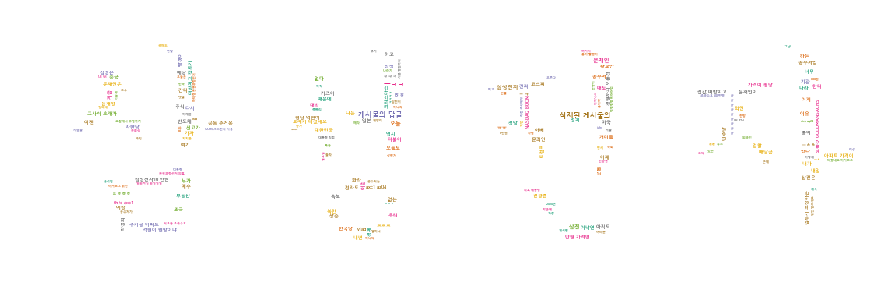

In [30]:
plt.figure(figsize = (15,8))
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HANDotumB.ttf', background_color="white", colormap = "Dark2_r", 
               max_words=2000, mask=mask, max_font_size=500, random_state=42)
               
wc.generate_from_text(contents)

plt.imshow(wc)
plt.axis("off")
plt.savefig('WC_삼성전자.pdf')

### (5) 인간지표 별 주가 그래프 그리기

In [11]:
df_test = df[['날짜', '인간지표']]
df_dummies = pd.get_dummies(df_test['인간지표'])
df_hodu = pd.concat([df_test['날짜'], df_dummies], axis = 1)
df_hodu = df_hodu.groupby('날짜').sum()

In [12]:
df_hodu.head()

,안티,중립,찬티
날짜,,,
2019.12.12,58.0,63.0,146.0
2019.12.13,161.0,170.0,351.0
2019.12.14,102.0,86.0,171.0
2019.12.15,111.0,110.0,167.0
2019.12.16,166.0,121.0,246.0


In [13]:
def daily_stock_close(stock_code):
    
    daily_close = []
    date = []
    
    url = 'https://finance.naver.com/item/frgn.nhn?code=' + stock_code
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    for i in range(3,len(soup.select('table.type2')[1].select('tr'))) :
        
        try :
            daily_close.append(soup.select('table.type2')[1].select('tr')[i].select('td')[1].text.replace(',' , ''))
            date.append(soup.select('table.type2')[1].select('tr')[i].select('td')[0].text)
            
        except IndexError :
            continue
        
    return date, daily_close

## 종목코드
 - 삼성전자 : 005930
 - 셀트리온 : 068270
 - 에이치엘비 : 028300
 - 젬백스 : 082270
 - 메드팩토 : 235980
 - 플리토 : 300080
 - 화신테크 : 086250

In [14]:
date, daily_close = daily_stock_close("005930")

In [15]:
df_close = pd.DataFrame({"날짜" : date, "종가" : daily_close})

In [16]:
df_close.head()

,날짜,종가
0,2019.12.30,55800
1,2019.12.27,56500
2,2019.12.26,55400
3,2019.12.24,55000
4,2019.12.23,55500


In [17]:
df = pd.merge(df_close, df_hodu, how = 'right', on = '날짜')

In [18]:
df.sort_values(['날짜'], ascending=True, inplace=True)

In [19]:
df.dropna(axis=0, inplace=True)
df.head()

,날짜,종가,안티,중립,찬티
11,2019.12.12,53300,58.0,63.0,146.0
10,2019.12.13,54700,161.0,170.0,351.0
9,2019.12.16,54700,166.0,121.0,246.0
8,2019.12.17,56700,227.0,220.0,421.0
7,2019.12.18,56300,154.0,175.0,354.0


In [23]:
df['종가'] = df['종가'].astype(int)

In [20]:
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print('사용가능한 TTF 폰트 개수:', len(font_list))
font_list[:10] 

사용가능한 TTF 폰트 개수: 745


['C:\\Windows\\Fonts\\PERBI___.TTF',
 'C:\\Windows\\Fonts\\framdit.ttf',
 'C:\\Windows\\Fonts\\NGULIM.TTF',
 'C:\\WINDOWS\\Fonts\\VIVALDII.TTF',
 'C:\\WINDOWS\\Fonts\\cambriaz.ttf',
 'C:\\Windows\\Fonts\\phagspab.ttf',
 'C:\\WINDOWS\\Fonts\\SCHLBKBI.TTF',
 'C:\\Windows\\Fonts\\GARA.TTF',
 'C:\\WINDOWS\\Fonts\\GARABD.TTF',
 'C:\\Windows\\Fonts\\palabi.ttf']

In [21]:
font_fname = 'C:\\Windows\\Fonts\\HANDotumB.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

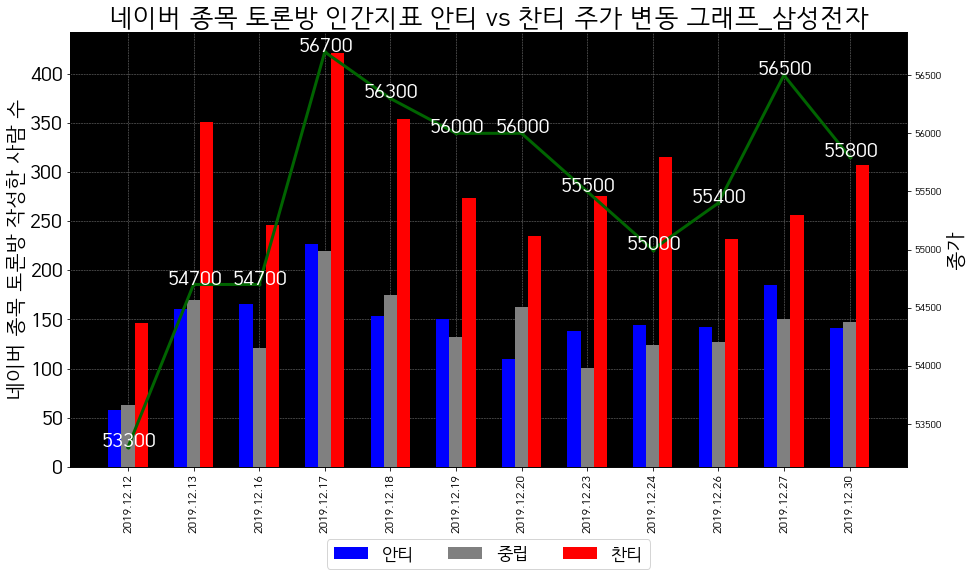

In [24]:
x = np.arange(len(df['날짜']))

fig, ax = plt.subplots(figsize=(15,8))
plt.bar(x+-0.2, df['안티'],width=0.2, label = '안티', color = 'blue')
plt.bar(x, df['중립'],width=0.2,  label = '중립', color = 'gray')
plt.bar(x+0.2, df['찬티'],width=0.2, label = '찬티', color = 'red')
plt.xticks(x, df['날짜'], fontsize='12', rotation = 90)
plt.title('네이버 종목 토론방 인간지표 안티 vs 찬티 주가 변동 그래프_삼성전자', fontsize='25')
plt.yticks(fontsize=20)
ax.set_ylabel('네이버 종목 토론방 작성한 사람 수', fontsize = '20')
ax.patch.set_facecolor('black')
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.legend(bbox_to_anchor=(0.5, -0.2), loc = 'center', ncol = 3, fontsize=17)


ax2 = ax.twinx()
ax2.set_ylabel('종가', fontsize = 20)
ax2.plot(df['종가'].values, linestyle='-', marker='.', linewidth=3.0, color = 'darkgreen')

for i, x in enumerate(x):
    plt.text(x-0.4, df['종가'].values[i], df['종가'].values[i], fontsize=20, color ='white')

plt.savefig('인간지표 주가 변동 그래프_삼성전자.png')
plt.show()